In [1]:
import torch

In [2]:
print(torch.version.cuda)

11.8


In [3]:
print(torch.__version__)

2.0.1+cu118


In [3]:
!huggingface-cli login

^C


In [4]:
from datasets import load_dataset

In [5]:
huggingface_dataset_name = "princepride4/datacenter-initial-zh-en"
dataset = load_dataset(huggingface_dataset_name)

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset parquet downloaded and prepared to C:/Users/wangz/.cache/huggingface/datasets/princepride4___parquet/princepride4--datacenter-initial-zh-en-ac2470a8f182b05a/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
dataset['train']['参考语言(英文)']

['(%1$d selected)',
 'The plug-in has been removed',
 'Process %s message sent successfully, message details:%s',
 '%d and %d do not match. Please enter correctly',
 'Error Information (value)',
 'Contract saving data is empty. Please check.',
 'Expenditure Item',
 'The cost system has been [%s] and cannot be operated on or before [%s]',
 '] project quotation time has expired, with [',
 'Failed to import the product because multiple SKUs of the current product have been put on shelves. Please select a specific product SKU; product code: %s',
 'Solution: In the Event Conversion Rules node, adjust the configuration of the conversion rule %s-%s Field: %s corresponding to Business Event: Busievent-reg Rule Code: %s.',
 'enterprise',
 'Description: Returns the minimum value that the given expression runs from the first line in the partition to the current line. \\n Syntax: ACCMIN; expression, groupfield; \\n Parameter: \\n- expression Required, any real number or text, which can be a consta

In [50]:
dataset['train'][25849]

{'资源编码': 'P_YS_FI_EAP-BE_1551737135403368471',
 '简体中文(源)': '付款退款明细信息第{0}行结算方式的业务属性是票据, 票据号或者票据类型不允许为空!',
 '参考语言(英文)': 'The business property of settlement method in line {0} of payment refund details Info is bill. The bill No. or bill type is required.'}

In [25]:
dataset['train'][25808]

{'资源编码': 'youzone_android_app_vote_topic',
 '简体中文(源)': "<Data><![CDATA[ 投票主题 <font color='#FF4E5B'> *</font> ]]> </Data>",
 '参考语言(英文)': "<Data><![CDATA[ Subject <font color='#FF4E5B'> *</font> ]]> </Data>"}

In [1]:
import time

In [2]:
time.time()

1704684166.4435399

In [3]:
time.time()-1704684166.4435399

14.561846017837524

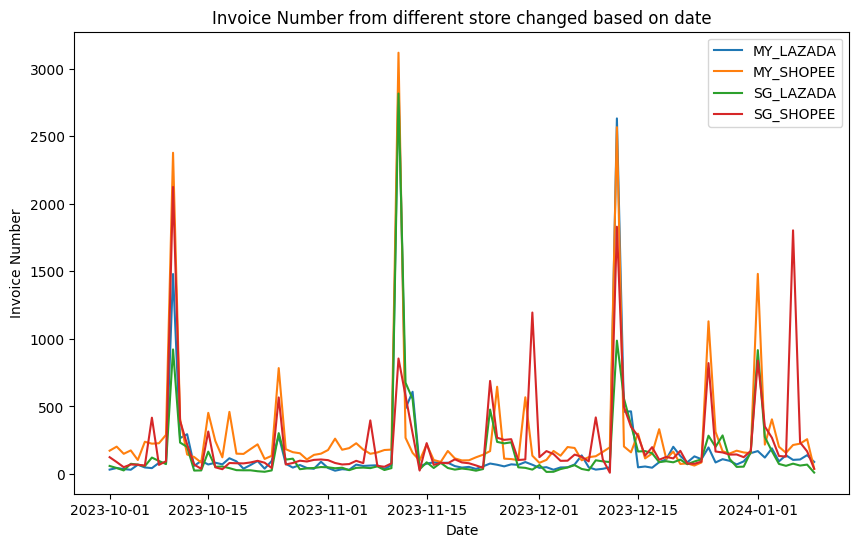

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 从CSV文件读取数据
df = pd.read_csv('./Untitled.csv')  # 请替换为实际的文件路径

# 将字符串日期转换为 datetime 对象
df['order_date'] = pd.to_datetime(df['order_date'], format='%d/%m/%Y')

selected_stores = ['MY_LAZADA', 'MY_SHOPEE', 'SG_SHOPEE', 'SG_LAZADA']
df = df[df['STORE'].isin(selected_stores)]
# 绘制折线图
plt.figure(figsize=(10, 6))

# 遍历不同的商店，分别绘制折线
for store, group in df.groupby('STORE'):
    plt.plot(group['order_date'], group['order_count'], label=store)

plt.title('Invoice Number from different store changed based on date')
plt.xlabel('Date')
plt.ylabel('Invoice Number')
plt.legend()
plt.show()


In [20]:
filtered_df = df[df['order_date'].isin(['10/10/2023','11/11/2023','12/12/2023'])]

In [21]:
filtered_df

,order_date,STORE,order_count
63,2023-10-10,MY_LAZADA,1480
65,2023-10-10,MY_SHOPEE,2377
66,2023-10-10,SG_LAZADA,922
68,2023-10-10,SG_SHOPEE,2124
280,2023-11-11,MY_LAZADA,2925
282,2023-11-11,MY_SHOPEE,3117
284,2023-11-11,SG_LAZADA,2815
286,2023-11-11,SG_SHOPEE,855
484,2023-12-12,MY_LAZADA,2631
486,2023-12-12,MY_SHOPEE,2566


In [13]:
sum_by_date = filtered_df.groupby('order_date')['order_count'].sum()

In [14]:
sum_by_date

order_date
2023-10-10    6903
2023-11-11    9712
2023-12-12    8014
Name: order_count, dtype: int64

In [22]:
filtered_df2 = df[~df['order_date'].isin(['10/10/2023','11/11/2023','12/12/2023'])]

In [18]:
average_orders_not_in_range = filtered_df2.groupby('order_date')['order_count'].sum().mean()

In [24]:
filtered_df2.groupby('STORE')['order_count'].mean()

STORE
MY_LAZADA    100.775510
MY_SHOPEE    212.326531
SG_LAZADA    115.010204
SG_SHOPEE    189.291667
Name: order_count, dtype: float64

In [3]:
import yaml

In [4]:
yaml.__version__

'6.0.1'